# "Unveiling Mall Customer Segmentation: A Clustering Analysis Approach." 

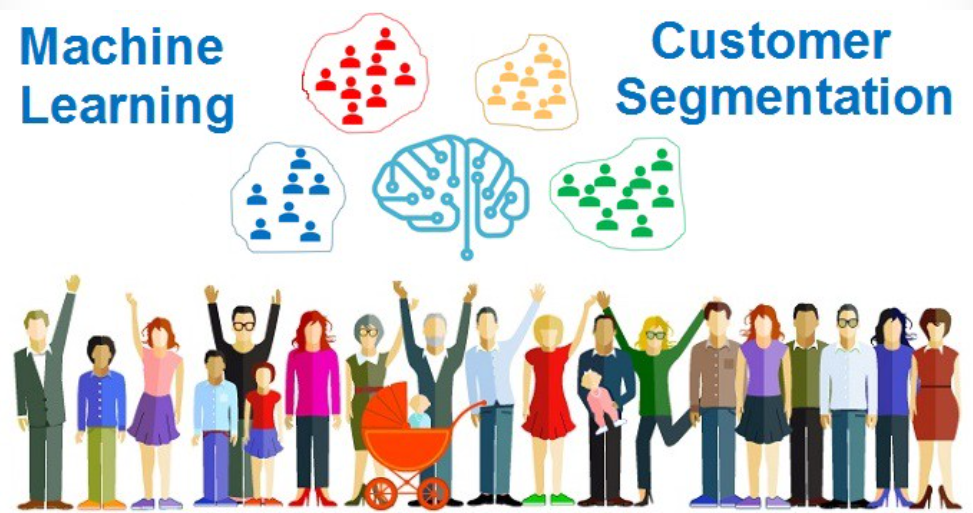

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

## Reading the Data
**Data is available in CSV file**

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# Total rows and columns 
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Variable Identification

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Finding Null Values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Selecting the features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Choosing the number of clusters
num_clusters = 5

In [11]:
# Creating an instance of the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [12]:
# Fitting the model to the data
kmeans.fit(features)

KMeans(n_clusters=5, random_state=42)

In [13]:
# Getting the cluster labels for each data point
cluster_labels = kmeans.labels_

In [14]:
# Adding the cluster labels to the original dataset
df['Cluster'] = cluster_labels

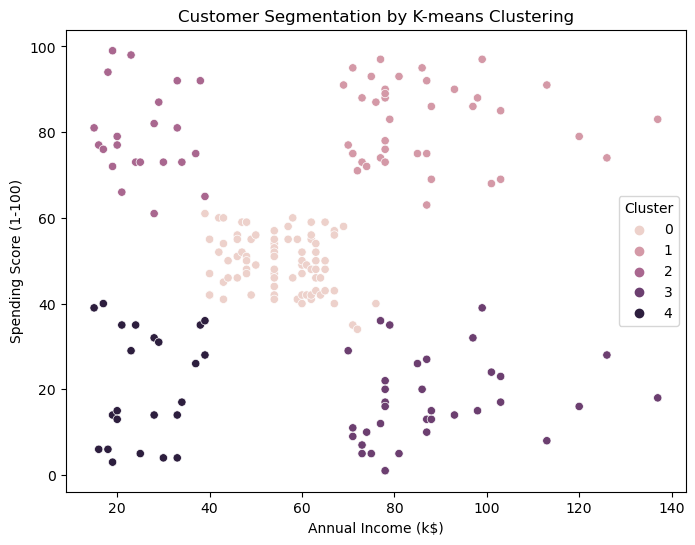

In [15]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df)
plt.title('Customer Segmentation by K-means Clustering')
plt.show()

**Cluster Centroids:**

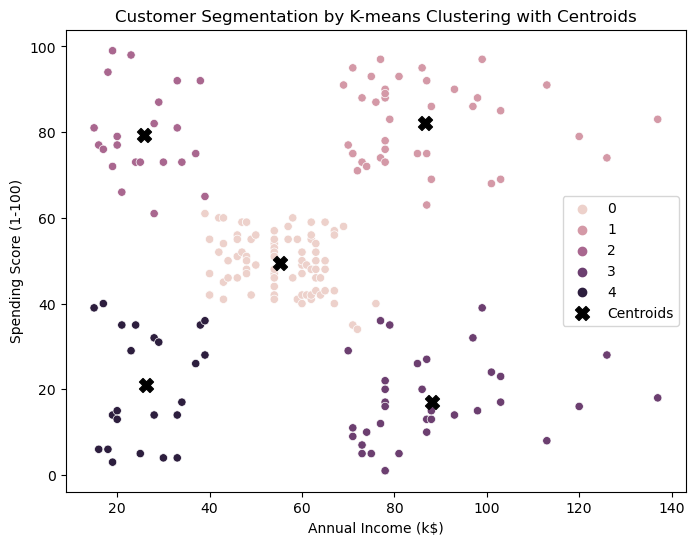

In [16]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.title('Customer Segmentation by K-means Clustering with Centroids')
plt.legend()
plt.show()

**Cluster Silhouette Analysis:**

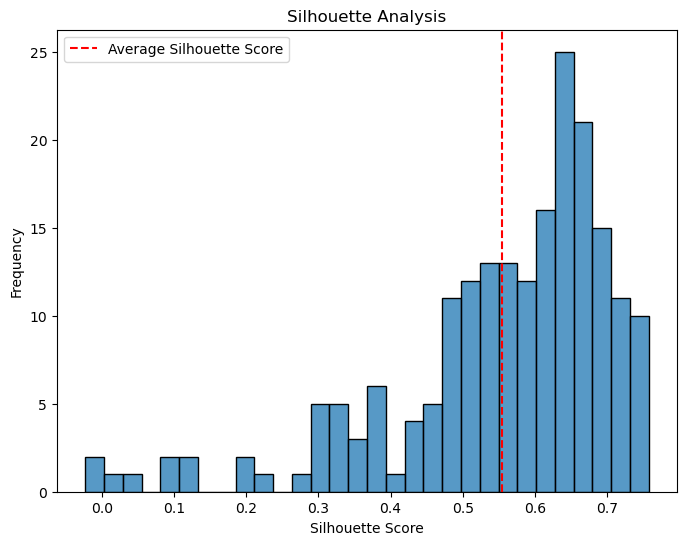

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(features, cluster_labels)
silhouette_avg = silhouette_score(features, cluster_labels)

plt.figure(figsize=(8, 6))
sns.histplot(silhouette_vals, bins=30)
plt.axvline(x=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Feature Distribution:**

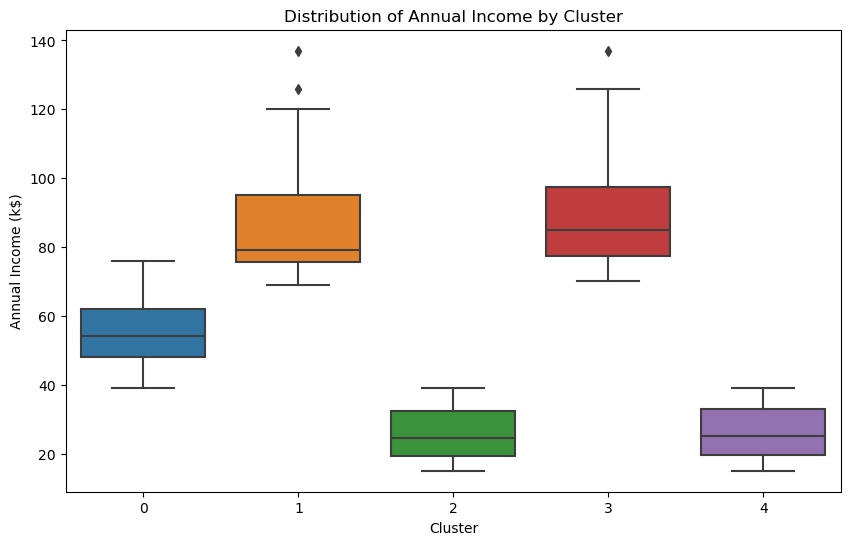

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()

**Dimensionality Reduction Visualization (using t-SNE):**

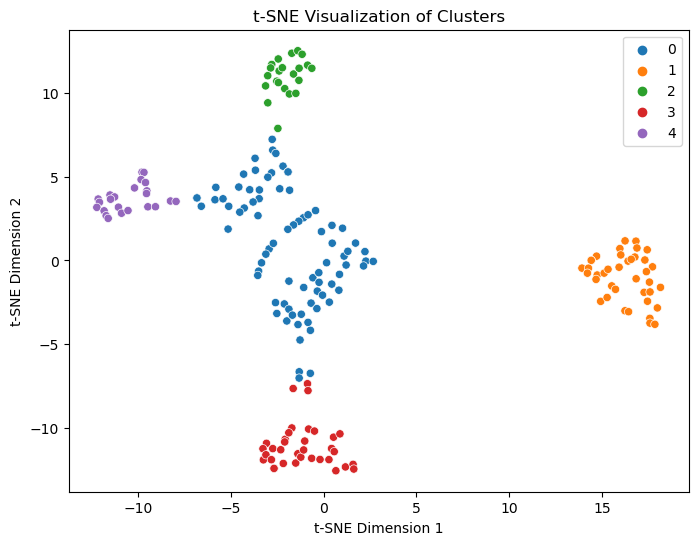

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=cluster_labels, palette='tab10')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

**"In this project, clustering analysis was performed on the Mall Customers dataset to identify distinct customer segments based on their annual income and spending score. The K-means clustering technique was utilized to visualize the clusters and observe the separation and distribution of customers. The scatter plot with cluster labels showcased the different groups and their boundaries, while the scatter plot with cluster centroids highlighted the central tendencies of each cluster. These insights provide valuable information for targeted marketing strategies, personalized experiences, and business optimization. Overall, this project demonstrates the power of unsupervised learning techniques in customer segmentation and provides actionable insights for data-driven decision-making."**